In [97]:
from skimage.io import imread,imshow,imsave
from skimage.util import random_noise
from PIL import Image
import numpy as np
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

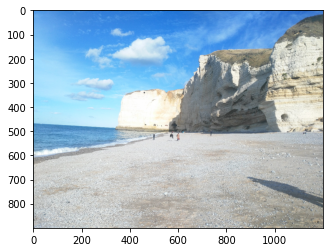

In [98]:
im = imread('etretat.jpg').astype(np.uint8)

plt.imshow(im)
plt.show()

liener filter

apply a noise on the image to see if the mean filter work 

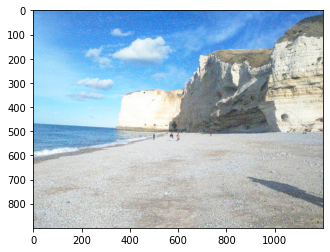

In [99]:
img_noised = random_noise(im,mode='salt', amount=0.04)
plt.figure()
plt.imshow(img_noised)
plt.show()

i creat the next function to do a Karnel filter on them using the Opencv lib

# Kenel concolution

In [100]:
def Sharpening_filters(image):
    kernel = (np.array([[-1, -1, -1],
                        [-1, 9, -1],
                        [-1, -1, -1]]))
    filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
    return filtered


def Line_and_Edge_Enhancing_filters(image):
    kernel = (np.array([[-1, -1, -1],
                        [2, 2.9, 2],
                        [-1, -1, -1]]))
    filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
    return filtered


def Laplacian_filters(image):
    kernel = (np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]]))
    filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
    return filtered


def Gaussian_filters(image):
    kernel = (np.array([[1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]])) / 16
    filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
    return filtered


def Mean_filters(image):
    kernel = np.ones((3, 3)) / 9
    filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
    return filtered


def UnsharpeMasking_filters(image):
    kernel = (np.array([[1, 4, 6, 4, 1],
                        [4, 16, 24, 16, 4],
                        [6, 24, -476, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]])) * -1 / 256
    filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
    return filtered


def Sobel_filters(image):
    kernel1 = (np.array([[-1, -1, -1],
                         [-1, 9, -1],
                         [-1, -1, -1]]))
    kernel2 = (np.array([[-1, -1, -1],
                         [-1, 9, -1],
                         [-1, -1, -1]]))

    filtered1 = cv2.filter2D(src=image, kernel=kernel1, ddepth=-1)
    filtered = cv2.filter2D(src=filtered1, kernel=kernel2, ddepth=-1)
    return filtered


def Laplacian_of_Gaussian_filter(image):
    karnel = (np.array([[0, 1, 1, 2, 2, 2, 1, 1, 0],
                        [1, 2, 4, 5, 5, 5, 4, 2, 1],
                        [1, 4, 5, 3, 0, 3, 5, 4, 1],
                        [2, 5, 3, -12, -24, -12, 3, 2, 1],
                        [2, 5, 0, -24, -40, -24, 0, 5, 2],
                        [2, 5, 3, -12, -24, -12, 3, 2, 1],
                        [1, 4, 5, 3, 0, 3, 5, 4, 1],
                        [1, 2, 4, 5, 5, 5, 4, 2, 1],
                        [0, 1, 1, 2, 2, 2, 1, 1, 0]]))
    filtered = cv2.filter2D(src=image, kernel=karnel, ddepth=-1)

    return filtered

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


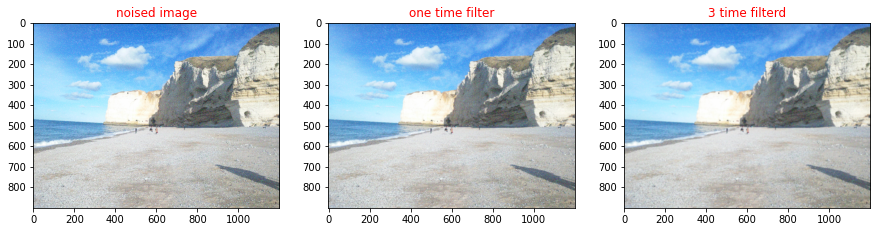

In [101]:
mean_1_time=Mean_filters(img_noised)
mean_3_time= Mean_filters(Mean_filters(Mean_filters(img_noised)))
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("noised image",color= 'red')
plt.imshow(img_noised)
plt.subplot(1,3,2)
plt.title("one time filter",color= 'red')
plt.imshow(mean_1_time)
plt.subplot(1,3,3)
plt.title("3 time filterd",color= 'red')
plt.imshow(mean_3_time)
plt.show()

using the filter on time did not get rid of all the noise but each time we aply it again it work better

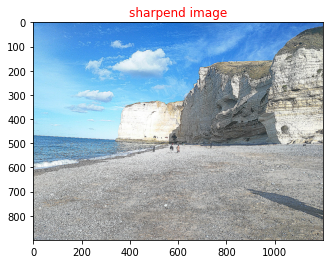

In [102]:
sharped_image = Sharpening_filters(im)
plt.imshow(sharped_image)
plt.title("sharpend image",color= 'red')
plt.show()

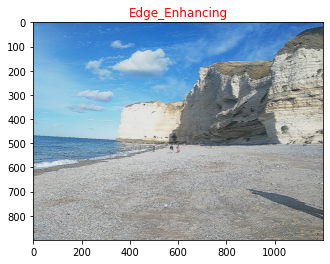

In [103]:
img4=Line_and_Edge_Enhancing_filters(im)
plt.title("Edge_Enhancing",color= 'red')
plt.imshow(img4)

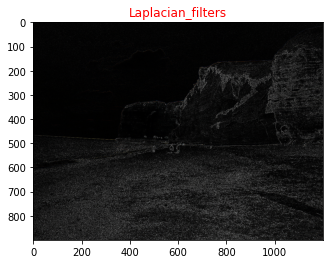

In [104]:
img5=Laplacian_filters(im)
plt.title("Laplacian_filters",color= 'red')
plt.imshow(img5)

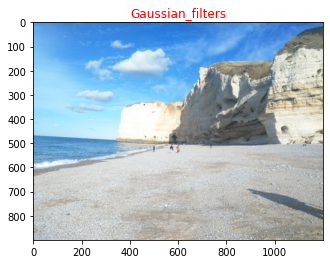

In [105]:
img6=Gaussian_filters(im)
plt.title("Gaussian_filters",color= 'red')
plt.imshow(img6)

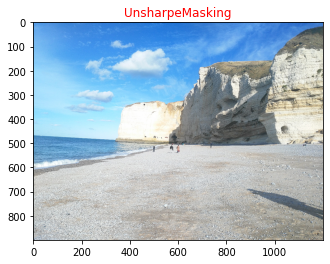

In [106]:
img7=UnsharpeMasking_filters(im)
plt.title("UnsharpeMasking",color= 'red')
plt.imshow(img7)

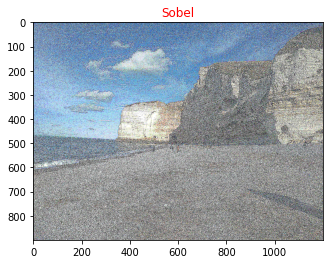

In [107]:
img8=Sobel_filters(im)
plt.title("Sobel",color= 'red')
plt.imshow(img8)

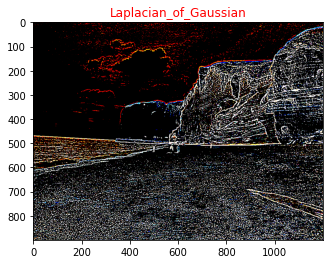

In [109]:
im9=Laplacian_of_Gaussian_filter(im)
plt.title("Laplacian_of_Gaussian",color= 'red')
plt.imshow(im9)

creat a pipline that take a bad image and fix it 

In [123]:
def pipline(image):
    step1 = Mean_filters(image)
    step2 = Gaussian_filters(step1)
    step3 = UnsharpeMasking_filters(step2)
    step4 = Mean_filters(step3)
    return step4,step1,step2,step3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


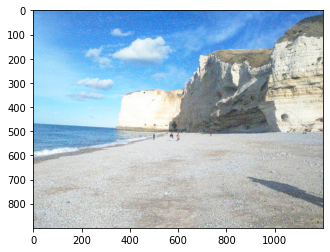

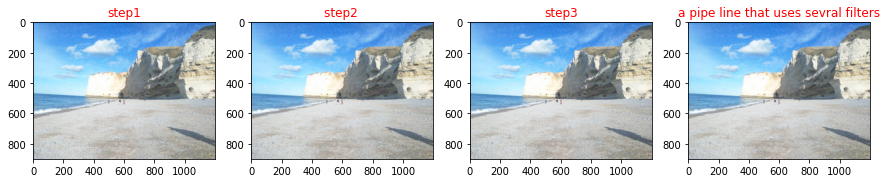

In [126]:
P,s1,s2,s3=pipline(img_noised)

plt.imshow(img_noised)
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title("step1",color= 'red')
plt.imshow(s1)
plt.subplot(1,4,2)
plt.title("step2 ",color= 'red')
plt.imshow(s2)
plt.subplot(1,4,3)
plt.title("step3",color= 'red')
plt.imshow(s3)
plt.subplot(1,4,4)
plt.title("a pipe line that uses sevral filters",color= 'red')
plt.imshow(P)
plt.show()